In [1]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train = pd.read_csv('C:/Users/Admin/Desktop/Ecolab_hackathon/train.csv')

In [3]:
df_test = pd.read_csv('C:/Users/Admin/Desktop/Ecolab_hackathon/test.csv')

In [4]:
df_train.shape

(33908, 17)

In [5]:
df_test.shape

(11303, 16)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        33908 non-null  int64 
 1   job        33908 non-null  object
 2   marital    33908 non-null  object
 3   education  33908 non-null  object
 4   default    33908 non-null  object
 5   balance    33908 non-null  int64 
 6   housing    33908 non-null  object
 7   loan       33908 non-null  object
 8   contact    33908 non-null  object
 9   day        33908 non-null  int64 
 10  month      33908 non-null  object
 11  duration   33908 non-null  int64 
 12  campaign   33908 non-null  int64 
 13  pdays      33908 non-null  int64 
 14  previous   33908 non-null  int64 
 15  poutcome   33908 non-null  object
 16  y          33908 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.4+ MB


-We see 7 numeric values and 10 objects(categorical variable) in the given Dataset.

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11303 entries, 0 to 11302
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11303 non-null  int64 
 1   job        11303 non-null  object
 2   marital    11303 non-null  object
 3   education  11303 non-null  object
 4   default    11303 non-null  object
 5   balance    11303 non-null  int64 
 6   housing    11303 non-null  object
 7   loan       11303 non-null  object
 8   contact    11303 non-null  object
 9   day        11303 non-null  int64 
 10  month      11303 non-null  object
 11  duration   11303 non-null  int64 
 12  campaign   11303 non-null  int64 
 13  pdays      11303 non-null  int64 
 14  previous   11303 non-null  int64 
 15  poutcome   11303 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


-Given Dataset has 7 numeric values and 9 objects(categorical variable) and doesnt have Target variable.We Would need to find and append the Target Variable using a best ML model.

In [8]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,retired,married,secondary,no,166,no,yes,unknown,3,jul,211,1,-1,0,unknown,no
1,51,blue-collar,married,primary,no,2995,yes,no,unknown,11,jun,93,2,-1,0,unknown,no
2,50,management,married,tertiary,no,569,no,yes,cellular,18,aug,452,4,-1,0,unknown,no
3,27,admin.,married,secondary,no,73,yes,no,cellular,5,feb,140,1,-1,0,unknown,no
4,38,self-employed,divorced,tertiary,no,6447,no,no,cellular,12,jan,296,1,-1,0,unknown,no


In [9]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,management,married,tertiary,no,6060,yes,no,unknown,15,may,71,2,-1,0,unknown
1,59,blue-collar,married,primary,no,99,yes,no,cellular,5,feb,43,1,261,3,failure
2,37,housemaid,married,primary,no,0,yes,no,cellular,24,jul,347,5,-1,0,unknown
3,41,blue-collar,divorced,secondary,no,-90,yes,no,cellular,18,nov,103,6,-1,0,unknown
4,27,student,single,tertiary,no,4869,yes,no,cellular,15,may,258,2,343,4,other


In [10]:
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,40.966763,1370.713136,15.803763,257.899227,2.752920,40.168515,0.581987
std,10.613701,3111.689069,8.314558,258.607105,3.068299,99.892114,2.412482
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,179.000000,2.000000,-1.000000,0.000000
75%,48.000000,1430.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df_test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000
mean,40.844555,1336.949571,15.814386,258.954614,2.796603,40.285765,0.575334
std,10.633874,2834.519004,8.346550,254.272247,3.185436,100.839679,1.939986
min,18.000000,-4057.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,68.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,48.000000,1412.500000,21.000000,322.000000,3.000000,-1.000000,0.000000
max,93.000000,81204.000000,31.000000,3322.000000,58.000000,831.000000,55.000000


### Univariate analysis

In [12]:
#bifurcating Numerical and Categorical variables from Training dataset
df_numerical  = df_train[['age','balance','day','duration','campaign','previous','pdays']] # Will use histogram to analyze


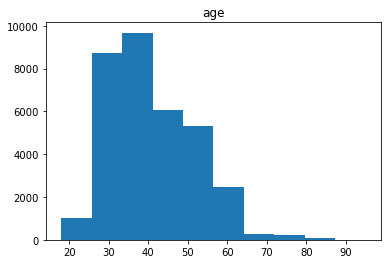

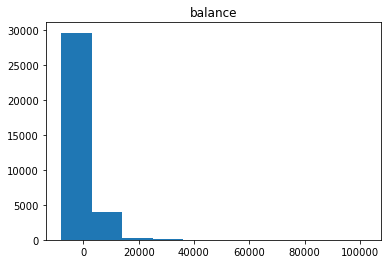

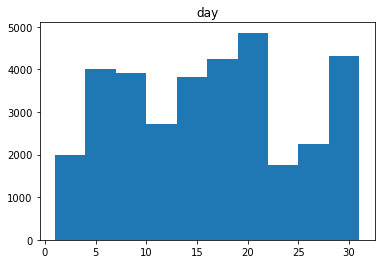

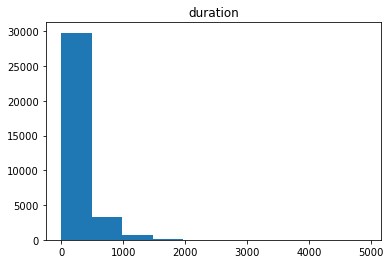

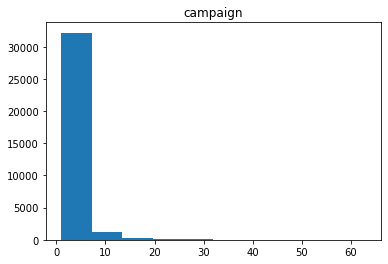

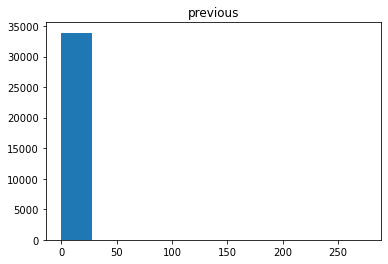

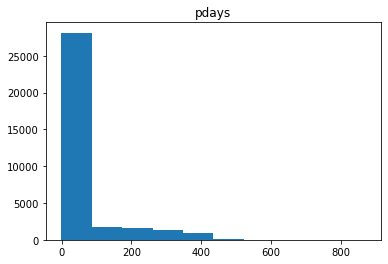

In [13]:
#displaying numeric variables to get insights  
for i in df_numerical.columns:
    plt.hist(df_numerical[i])
    plt.title(i)
    plt.show()

## 1.EDA & Data cleaning

['age', 'balance', 'day', 'duration', 'campaign', 'previous', 'pdays']


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\si

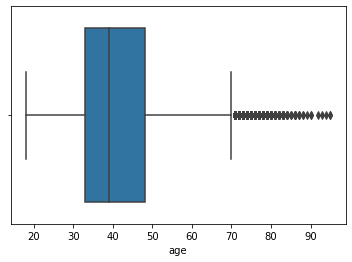

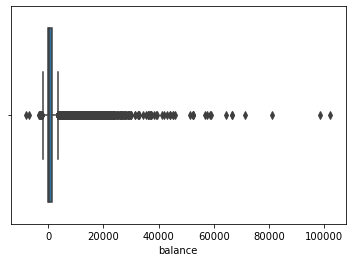

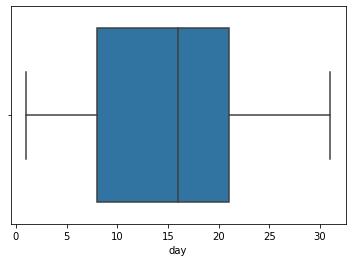

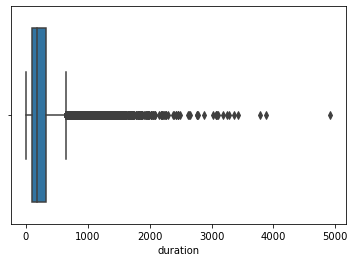

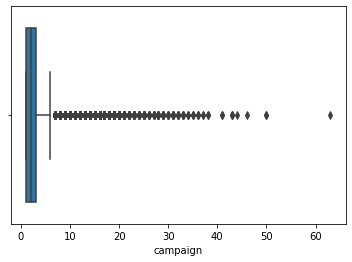

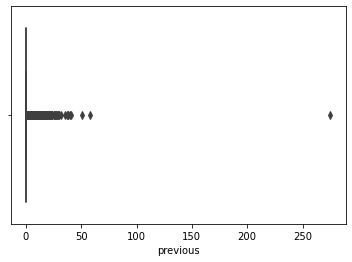

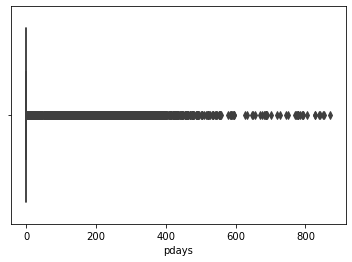

In [14]:
my_test=[]
for col in df_numerical.columns:
    my_test.append(col)
    
print(my_test)

for i in my_test:
    plt.figure(i)
    sns.boxplot(df_numerical[i])
plt.show()

#### Outlier treatment-IQR for cleanup 

In [15]:
#age
#outlier treatment-IQR
#IQR-for removing outliers
dataset = sorted(df_train.age)
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 -q1
print('Iqr:',iqr)
lower_fence = q1 -(1.5*iqr)
higher_fence = q3+(1.5*iqr)
print('lower_fence =',lower_fence,'higher_fence=',higher_fence)

33.0 48.0
Iqr: 15.0
lower_fence = 10.5 higher_fence= 70.5


In [16]:
#Outlier Treatment
df_train.age = np.where(df_train.age>higher_fence,higher_fence,df_train.age)


Text(0.5, 1.0, 'Box plot of outliers free-Age')

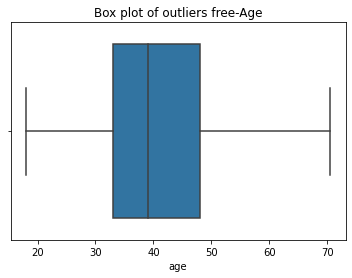

In [17]:
sns.boxplot(x=df_train.age,data=df_train)
plt.title('Box plot of outliers free-Age') 

In [18]:
#balance
#outlier treatment-IQR
#IQR-for removing outliers
dataset = sorted(df_train.balance)
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 -q1
print('Iqr:',iqr)
lower_fence = q1 -(1.5*iqr)
higher_fence = q3+(1.5*iqr)
print('lower_fence =',lower_fence,'higher_fence=',higher_fence)

74.0 1430.0
Iqr: 1356.0
lower_fence = -1960.0 higher_fence= 3464.0


In [19]:
df_train.balance = np.where(df_train.balance>higher_fence,higher_fence,df_train.balance)

In [20]:
df_train['balance'] = np.where(df_train['balance'] < lower_fence, lower_fence, df_train['balance'])

Text(0.5, 1.0, 'Box plot of outliers free-balance')

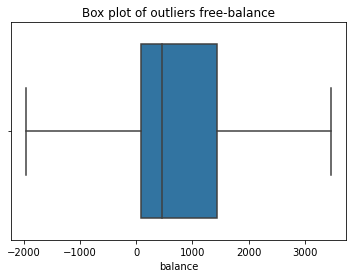

In [21]:
sns.boxplot(x=df_train.balance,data=df_train)
plt.title('Box plot of outliers free-balance')

In [22]:
#duration

#outlier treatment-IQR
#IQR-for removing outliers
dataset = sorted(df_train.duration)
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 -q1
print('Iqr:',iqr)
lower_fence = q1 -(1.5*iqr)
higher_fence = q3+(1.5*iqr)
print('lower_fence =',lower_fence,'higher_fence=',higher_fence)

103.0 318.0
Iqr: 215.0
lower_fence = -219.5 higher_fence= 640.5


In [23]:
df_train['duration'] = np.where(df_train['duration'] > higher_fence, higher_fence, df_train['duration'])

Text(0.5, 1.0, 'Box plot of outliers free-duration')

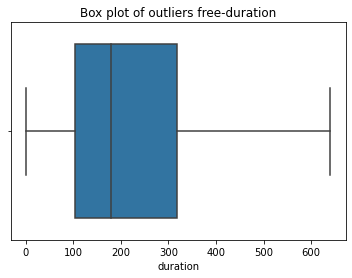

In [24]:
sns.boxplot(x=df_train.duration,data=df_train)
plt.title('Box plot of outliers free-duration') 

In [25]:
#campaign
#outlier treatment-IQR
#IQR-for removing outliers
dataset = sorted(df_train.campaign)
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 -q1
print('Iqr:',iqr)
lower_fence = q1 -(1.5*iqr)
higher_fence = q3+(1.5*iqr)
print('lower_fence =',lower_fence,'higher_fence=',higher_fence)

1.0 3.0
Iqr: 2.0
lower_fence = -2.0 higher_fence= 6.0


In [26]:
df_train.campaign = np.where(df_train.campaign>higher_fence,higher_fence,df_train.campaign)

Text(0.5, 1.0, 'Box plot of outliers free-campaign')

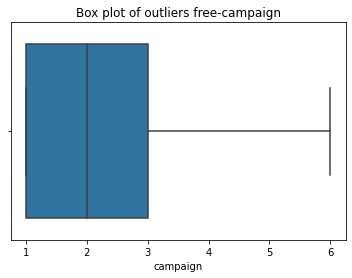

In [27]:
sns.boxplot(x=df_train.campaign,data=df_train)
plt.title('Box plot of outliers free-campaign') 


In [28]:
#pdays

#outlier treatment-IQR
#IQR-for removing outliers
dataset = sorted(df_train.pdays)
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 -q1
print('Iqr:',iqr)
lower_fence = q1 -(1.5*iqr)
higher_fence = q3+(1.5*iqr)
print('lower_fence =',lower_fence,'higher_fence=',higher_fence)

-1.0 -1.0
Iqr: 0.0
lower_fence = -1.0 higher_fence= -1.0


In [29]:
df_train.pdays = np.where(df_train.pdays>higher_fence,higher_fence,df_train.pdays)

Text(0.5, 1.0, 'Box plot of outliers free-pdays')

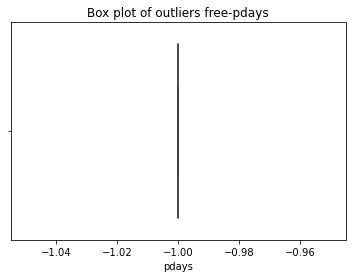

In [30]:
sns.boxplot(x=df_train.pdays,data=df_train)
plt.title('Box plot of outliers free-pdays') 


#"pdays" doesnt provide any relevant information,while checking corralation,if it hasnt any significance we may remove this variable

In [31]:
#previous


#outlier treatment-IQR
#IQR-for removing outliers
dataset = sorted(df_train.previous)
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 -q1
print('Iqr:',iqr)
lower_fence = q1 -(1.5*iqr)
higher_fence = q3+(1.5*iqr)
print('lower_fence =',lower_fence,'higher_fence=',higher_fence)

0.0 0.0
Iqr: 0.0
lower_fence = 0.0 higher_fence= 0.0


In [32]:
df_train.previous = np.where(df_train.previous>higher_fence,higher_fence,df_train.previous)

Text(0.5, 1.0, 'Box plot of outliers free-previous')

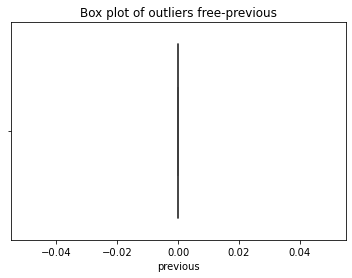

In [33]:
sns.boxplot(x=df_train.previous,data=df_train)
plt.title('Box plot of outliers free-previous') 

#"previous" is not providing any relevant information and is showing same behaviour as"pdays".

               age   balance       day  duration  campaign  previous     pdays
age       1.000000  0.102939 -0.008155 -0.004268  0.008213  0.003809 -0.022193
balance   0.102939  1.000000  0.004267  0.021571 -0.012657  0.013100  0.000708
day      -0.008155  0.004267  1.000000 -0.030962  0.161459 -0.050045 -0.089750
duration -0.004268  0.021571 -0.030962  1.000000 -0.082323 -0.002274 -0.003559
campaign  0.008213 -0.012657  0.161459 -0.082323  1.000000 -0.030655 -0.087911
previous  0.003809  0.013100 -0.050045 -0.002274 -0.030655  1.000000  0.436730
pdays    -0.022193  0.000708 -0.089750 -0.003559 -0.087911  0.436730  1.000000


<AxesSubplot:>

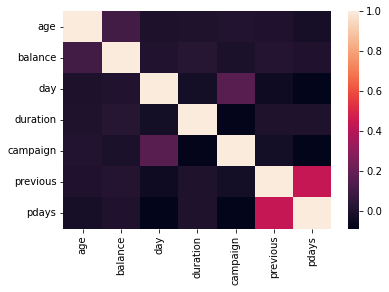

In [34]:
print(df_numerical.corr())
sns.heatmap(df_numerical.corr())

#As shown in the above heatmap previous & pdays show some kind of correlation



### 2.DATA MANIPULATION

In [35]:
#changing required catagorical values 
df_train['job'].replace('admin.','admin',inplace=True)

In [36]:
df_train['job'].replace('blue-collar','blue collar',inplace=True)

In [37]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,retired,married,secondary,no,166.0,no,yes,unknown,3,jul,211.0,1.0,-1.0,0.0,unknown,no
1,51.0,blue collar,married,primary,no,2995.0,yes,no,unknown,11,jun,93.0,2.0,-1.0,0.0,unknown,no
2,50.0,management,married,tertiary,no,569.0,no,yes,cellular,18,aug,452.0,4.0,-1.0,0.0,unknown,no
3,27.0,admin,married,secondary,no,73.0,yes,no,cellular,5,feb,140.0,1.0,-1.0,0.0,unknown,no
4,38.0,self-employed,divorced,tertiary,no,3464.0,no,no,cellular,12,jan,296.0,1.0,-1.0,0.0,unknown,no


#### Checking categorical variables.

In [38]:
df_categorical = df_train[['job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome']]

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


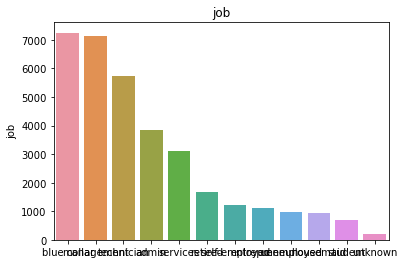

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


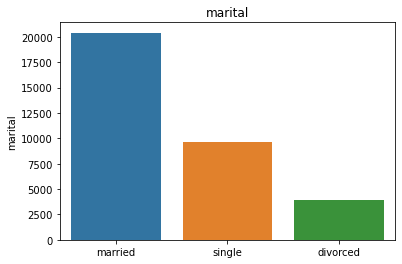

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


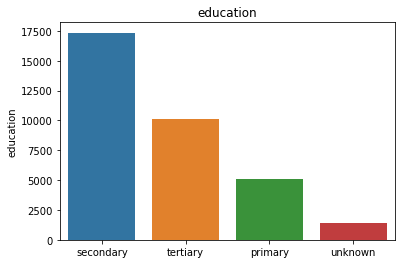

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


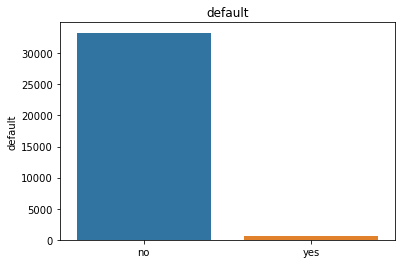

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


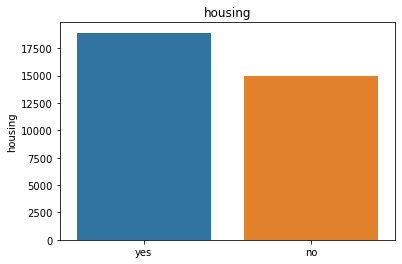

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


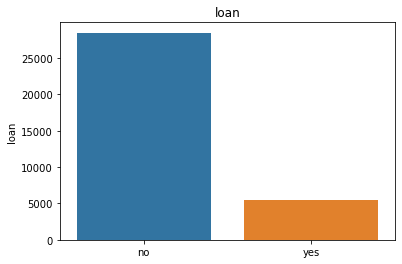

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


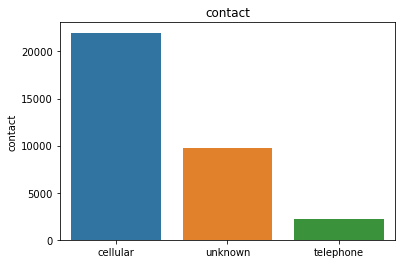

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


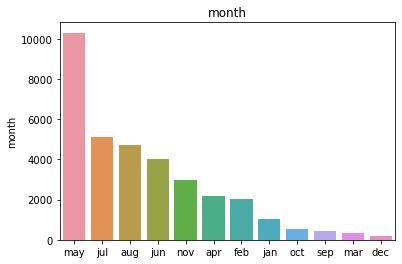

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


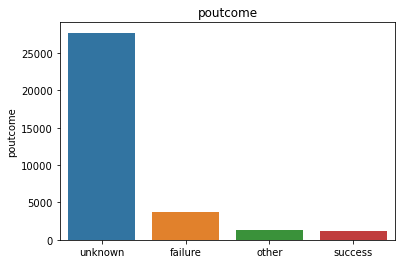

In [39]:
for i in df_categorical.columns:
    sns.barplot(df_categorical[i].value_counts().index,df_categorical[i].value_counts()).set_title(i)
    plt.show()

## Bivariate Analysis

<AxesSubplot:xlabel='count', ylabel='education'>

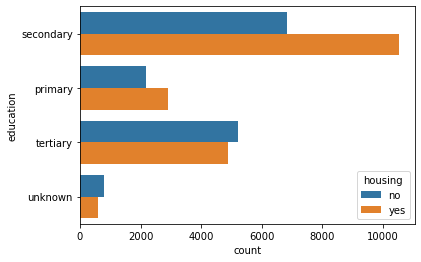

In [40]:
sns.countplot(y ='education', hue = "housing", data = df_train)

#People with secondary education and tertiary education top the list of housing loan.

<AxesSubplot:xlabel='count', ylabel='marital'>

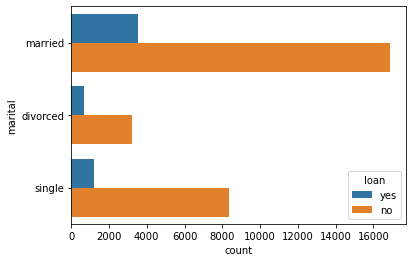

In [41]:
sns.countplot(y ='marital', hue = "loan", data = df_train)

#Majority of the people dont have any personal loan.high number of personal loans holders belong to married catogory.

<AxesSubplot:xlabel='y', ylabel='balance'>

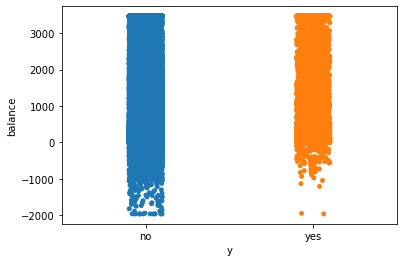

In [42]:
sns.stripplot(y='balance',x='y',data =df_train)

#negative balance account holders are in more number and are non subscribers.We also see few subscribers with negative balance.

<AxesSubplot:xlabel='marital', ylabel='age'>

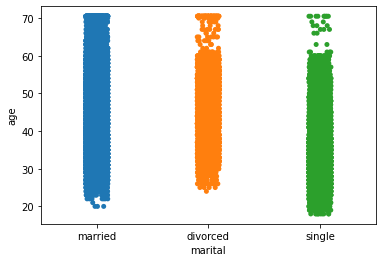

In [43]:
sns.stripplot(y='age',x='marital',data =df_train)

#People in the age group of 25 to 70 are mostly married. Divocees and single people are less in age range of 60 & 70.

## Multivariate Analysis

#Ploting pivot tables to  see Target Variable counts in heap of multiple variables .

In [44]:
pd.pivot_table (df_train, index = "y", values = ['age','balance','day','duration','campaign','previous'])

,age,balance,campaign,day,duration,previous
y,,,,,,
no,40.817892,896.707926,2.436659,15.887679,209.276293,0.0
yes,41.503151,1234.701034,2.031258,15.170406,424.344467,0.0


In [45]:
pd.pivot_table(df_train, index = 'y', columns = 'marital', values = 'balance', aggfunc = 'count')

marital,divorced,married,single
y,,,
no,3440,18320,8181
yes,468,2079,1420


In [46]:
pd.pivot_table(df_train, index = 'y', columns = 'education', values = 'balance' ,aggfunc ='count')

education,primary,secondary,tertiary,unknown
y,,,,
no,4658,15525,8560,1198
yes,440,1821,1519,187


In [47]:
pd.pivot_table(df_train, index = 'y', columns = 'housing', values = 'duration' ,aggfunc ='count')

housing,no,yes
y,,
no,12507,17434
yes,2485,1482


### 3.Data cleaning

In [48]:
#removing "pdays" column as it doesnt give any relevant insights or information
df_train = df_train.drop(['pdays'], axis = 1)

### 4.Feature engineering

In [49]:
#label encoding in target variable column
# Encode labels in column 'y'.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train['y']= label_encoder.fit_transform(df_train['y'])
  
df_train['y'].unique()

array([0, 1])

## 5.Splitting Data

In [50]:
###Splitting Dataset
X = df_train.drop("y", axis=1)
Y = df_train["y"]

In [51]:
X.shape

(33908, 15)

In [52]:
Y.shape

(33908,)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

### 6.Feature engineering using Pipeline

In [54]:
numeric_features = ['age','balance','day','duration','campaign','previous']

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [56]:
#Preprocessing for numerical data
from sklearn.impute import SimpleImputer
numerical_transformer = SimpleImputer(strategy='median')

In [57]:
#Preprocessing for categorical data
#from sklearn.preprocessing import OneHotEncoder
#categorical_transformer = Pipeline(steps=[
#('imputer', SimpleImputer(strategy='most_frequent')),
#('one_hot_encoder', OneHotEncoder(sparse=False))
#])

In [58]:
#Preprocessing for categorical data
from sklearn.preprocessing import OneHotEncoder
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [59]:
#Bundle preprocessing for numerical and categorical data
from sklearn.compose import ColumnTransformer
categorical_features = ['job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome']
numeric_features = ['age','balance','day','duration','campaign','previous']
preprocessor = ColumnTransformer(
transformers=[
('num', numerical_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)
])

### 7.Model Building

In [60]:
#Define model
from sklearn.ensemble import RandomForestClassifier
model_final = RandomForestClassifier(n_estimators=100, random_state=10)

In [61]:
#Bundle preprocessing and modeling code in a pipeline##worked&
my_pipeline_final = Pipeline(steps=[('preprocessor', preprocessor),
('model', model_final)
])


In [62]:
#Preprocessing of training data, fit model
my_pipeline_final.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                          

In [63]:
#Preprocessing of validation data, get predictions
preds_final = my_pipeline_final.predict(X_test)

In [64]:
#model_rf_trail2.fit(X_train, Y_train)

In [65]:
#Preprocessing of validation data, get predictions
#preds_trial = model_rf_trail2.predict(X_test)

In [66]:
from sklearn.metrics import mean_absolute_error
score_final = mean_absolute_error(Y_test, preds_final)

In [67]:
score_final

0.09525213801238573

### 8.Checking accuracy & F1 score

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
accuracy_score(Y_test, preds_final)
print('Accuracy: %.3f' % f1_score(Y_test, preds_final))

Accuracy: 0.489


In [70]:
from sklearn.metrics import f1_score
print('F1 Score: %.3f' % f1_score(Y_test, preds_final))


F1 Score: 0.489


### 9.Prediction

In [71]:
#prediction
y_pred = my_pipeline_final.predict(X_test)

In [72]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9047478619876143

### 10.Evaluating the model [Perfomance matrix]

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[8741,  257],
       [ 712,  463]], dtype=int64)

In [76]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
#XGboost

In [77]:
from xgboost import XGBClassifier

In [78]:
model_xg = XGBClassifier()

In [80]:
my_pipeline_xg = Pipeline(steps=[('preprocessor', preprocessor),
('model', model_xg)
])


In [81]:
#Preprocessing of training data, fit model
my_pipeline_xg.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                          

In [82]:
#Preprocessing of validation data, get predictions
preds_xg = my_pipeline_xg.predict(X_test)

In [83]:
from sklearn.metrics import mean_absolute_error
score_xg = mean_absolute_error(Y_test, preds_xg)

In [84]:
score_xg

0.09790622235328812

In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds_xg))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      8998
           1       0.60      0.47      0.53      1175

    accuracy                           0.90     10173
   macro avg       0.76      0.72      0.74     10173
weighted avg       0.89      0.90      0.90     10173



### 11.Final Submission

In [86]:
#writing the prediction data to the submission file
submission = pd.read_csv('C:/Users/Admin/Desktop/Ecolab_hackathon/submission.csv')

In [87]:
#Doing a sanity check on the submition file 
len(submission)

11303

In [88]:
#Doing a sanity check on the Test file 
len(df_test)

11303

In [89]:
df_test = pd.read_csv('C:/Users/Admin/Desktop/Ecolab_hackathon/test.csv')

In [90]:
predictions = my_pipeline_final.predict(df_test)

In [91]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
checking_submission = pd.DataFrame({ "Serial_no": submission["Serial_no"],"pred": predictions})

In [93]:
checking_submission.to_csv('final_submission.csv', index=False)

## Thank you...!!